# Примена машинског учења у обради текстуалних података

У овој свесци истражићемо како нам алгоритми машинског учења могу помоћи у организацији колекција правних докумената. Прецизније, одговорићемо на следећа питања:
- Шта је то вишелабеларна класификација?
- Чему служи платформа Eur-Lex и тезаурус EurоVoc?
- Како је организован скуп података ЕuroLex57k?
- Шта су тансформери и како се може користити унапређени модел legalBERT?
- Како се уз помоћ библиотеке PyPDF2 могу читати документи у PDF формату?

## Вишелабеларна класификација докумената

У послу се неретко сусрећемо са изазовом да уредимо и организујемо колекцију докумената којом располажемо. Некада је документе потребно уредити хронолошки, некада по имену аутора, а некада по теми. За разлику од прва два критеријума уређивања у којима се датуми и аутори докумената могу релативно једноставно очитати, одређивање тема присутних у документу захтева читање целог документа и његову пажљиву анализу. Што је колекција докумената већа и разноврснија, то је овај задатак временски захтевнији и напорнији. Зато су од користи програми који у документима могу аутоматски идентификовати присутне теме и придружити им их. Такве програме зовемо **класификаторима** (енгл. classifier). Скуп могућих тема обично дефинишемо унапред тако да садржи неки коначан, за посао релевантан, скуп вредности. Ове вредности ћемо надаље називати **обележјима** или **лабелама** (енгл. label).  Задатак **вишелабеларне класификације** (engl. multilabel classification) докумената је да сваком од докумената придружи одговарајуће лабеле, једну или више њих. 

У наставку ћемо проћи кроз пример развоја и коришћења једног оваквог класификатора. 

<figure style='text-align: center'>
    <img src='nlp/assets/classification_3.jpeg' style='width: 400px;'>
    <figcaption> Класификација докумената </figcaption>
</figure>

Да бисмо развили овакав класификатор биће нам потребна група докумената која већ има мануелно придружене лабеле. Такву групу докумената зовемо **скупом за обучавање** (енгл. training set). Поред скупа за обучавање биће нам потребна и једна група мануелно обележених докумената над којом ћемо моћи да тестирамо колико успешно ради класификатор који смо обучили. Ту групу докумената зовемо **скупом за тестирање** (енгл. test set). У пракси издвајамо и једну групу докумената коју називамо **валидационим скупом** (енгл. validation set) и коју користимо за праћење развоја самог класификатора. 

Због захтева за постојањем ових скупова, у заједници која се бави машинским учењем задатак класификације се убраја у задатке  **надгледаног машинског учења** (енгл. supervised machine learning). Алгоритми који се користе за решавање ове групе задатака имају за циљ да науче везу између улаза (у нашем случају докумената) и придружених лабела тако да је грешка коју праве на скупу за тестирање што је могуће мања, а успешност примене на новим, будућим, улазима, што већа. Ово својство класификатора се назива **генерализација**. Више о задатку класификације и скуповима које смо увели можете прочитати у свесци <a href ='nlp/01-Klasifikacija dokumenata.ipynb'> 01-Класификација докумената </a>. 

## Платформа Eur-Lex, скуп података EurLex57k и тезаурус EuroVoc

Како се могу организовати правни документи приказаћемо на примеру скупа података који се зове **EurLex57k**.  Овај скуп је настао обједињавањем докумената преузетих са платформе <a href='https://eur-lex.europa.eu/homepage.html'> EUR-lex </a>, централне платформе преко које се са јавношћу деле званични документи Европске уније попут закона, међународних споразума, судских пракси, националних мера транспозиције и многих других типова правних докумената. Сваки од ових докумената је доступан на 24 званична језика Европске уније. Скуп података EurLex57k садржи верзије ових докумената на енглеском језику, а као што се може наслутити из имена скупа, укупно броји 57 хиљада докумената. Скуп за тренирање садржи 45 хиљада докумената, а скупови за валидацију и тестирање по 6 хиљада докумената. У свесци <a href='nlp/02-Skup podataka EurLex57k.ipynb'> 02-Skup podataka EurLex57k </a> можете пронаћи више информација о скупу и његовим карактеризацијама.

Свим документима скупа EurLex57 су мануелно придружене лабеле које су побројане у тезаурусу који се зове <a href='https://op.europa.eu/en/web/eu-vocabularies/dataset/-/resource?uri=http://publications.europa.eu/resource/dataset/eurovoc'> EuroVoc </a>. Тезаурус EuroVoc представља један хијерархијски организован вокабулар са двадесет и једним доменом на највишем нивоу. Сваки од ових домена покрива неки специфични сегмент деловања и садржи лабеле које су за њега релевантне. Тако, на пример, домен *environment* обухвата поддомене *environmental policy*, *natural environment* и *deterioration of the environment* од којих први садржи лабеле *climate change*, *water policy*, *waste managment* и друге. Сваком од домена, поддомена и лабела је придружен и јединствен нумерички идентификатор. Тако домену *environment* одговара идентификатор 52, поддомену *environmental policy* идентификатор 5206, а лабели *waste management* идентификатор 1158. Попис свих домена, њихових имена и јединствених нумеричких идентификатора, издвојен је у датотеци *domains_with_id_and_name.txt*, док је попис свих идентификатора лабела придружених доменима издвојен у датотеци *concepts_per_domain.txt* (организација која ради на развоју тезауруса EuroLex фаворизује коришћење термина концепт уместо лабела). Нешто касније ћемо видети и садржај ових датотека, а све специфичности у вези са њиховим креирањем и додатна појашњења у вези са организацијом тезауруса EuroVoc се могу пронаћи у свесци <a href='nlp/03-Tezaurus%20EuroVoc.ipynb'>03-Tezaurus EuroVoc</a>.  

<table style='caption-side: bottom'>
    <caption>Домен <i>environment</i>, његови поддомени (микротезауруси) <i>environmental policy</i>, <i>natural environment</i> и <i>deterioration of the environment</i> и листа лабела поддомена <i>environmental policy</i></caption>
    <tr>
        <td><img src='nlp/assets/environment_eurovoc_1.png'></td>
        <td><img src='nlp/assets/environment_eurovoc_2.png'></td>
    </tr>
</table>

<div class='alert-info' style='padding: 10px;'> 
Сада када знамо шта је вишелабеларна класификација и како се врши организација докумената на нивоу Европске уније можемо прецизирати задатак којим ћемо се бавити: правном документу придружити одговарајуће лабеле тезауруса EuroVoc. Како лабела у тезаурусу имам јако пуно (чак око седам хиљада!), документима ћемо придруживати искључиво лабеле које означавају домене највишег нивоа. 
</div> 

## Библиотека transformers и модел LegalBert

Библиотека чије ћемо функционалности користити за учитавање скупа података, обучавање модела, његову анализу и покретање зове се <a href='https://huggingface.co/transformers/'>transformers</a>. Трансформери су специјалан тип неуронских мрежа који се са великим успехом користе у многим задацима машинског учења. Библиотека transformers поштује концепте отвореног кода и обједињава готово све познате трансформере уз могућност удобног и интуитивног коришћења. 

Неки општи протокол у раду са трансформерима је да се пође од неког подесног трансформера, а затим да се ради на његовом прилагођавању специфичном задатку који треба решити (овај процес се на енглеском језику назива *fine-tuning*). Mи смо у раду пошли од трансформера који се зове *LegalBert* зато што може лепо да разуме семантику правних докумената, а потом смо га прилагодили тако да може да класификује документа на горе описани начин. Званична страница библиотеке transformers посвећена моделу LegalBert се може прегледати на <a href='https://huggingface.co/nlpaueb/legal-bert-base-uncased'>овој</a> адреси. Финални прилагођени модел се налази у директоријуму *legalbert_model_finetuned*  и користићемо га у даљем раду.   

У свесци <a href='nlp/04-Biblioteka%20transformers%20i%20model%20LegalBert%20.ipynb'> 04-Biblioteka transformers i model LegalBert </a> можете прочитати више о мотивацији за овакав приступ у раду са трансформерима, док у свесци <a href='nlp/05-Prilаgodjavanje%20modela%20LegalBert.ipynb'> 05-Prilаgodjavanje modela LegalBert </a> можете испратити цео процес прилагођавања модела LegalBert. Овде ја важно напоменути да су трансформери који се користе у пракси по правилу велике мреже које захтевају напредне рачунске ресурсе у процесу обучавања. Примера ради, један познати трансформер са именом Берт је обучаван на специјализованом хардверу, а сами трошкови обучавања се процењују на око 7 хиљада долара. Зато је смисао дељења обучених модела врло оправдан и из еколошких и из материјалних разлога. 

## Експеримент: класификација правних докумената

Експеримент ћемо започети анализом скуп података EurLex57k. У учитавању скупа ће нам помоћи функција `load_dataset` библиотеке *transformers* тј. њеног пакета *datasets*.

In [1]:
from datasets import load_dataset

In [2]:
dataset = load_dataset('eurlex')

No config specified, defaulting to: eurlex/eurlex57k
Reusing dataset eurlex (C:\Users\v-anzece\.cache\huggingface\datasets\eurlex\eurlex57k\1.1.0\d2fdeaa4fcb5f41394d2ed0317c8541d7f9be85d2d601b9fa586c8b461bc3a34)


Информације о величини скупа, тј. његових делова за обучавање, тестирање и валидацију, можемо прочитати коришћењем својства *shape*.

In [3]:
print(dataset.shape)

{'train': (45000, 4), 'test': (6000, 4), 'validation': (6000, 4)}


Појединачне делове учитаног скупа можемо даље издвојити навођењем квалификатора `train`, `validation` и `test`. 

In [4]:
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']

Информације о учитаним скуповима попут описа, лиценци за коришћење, званичне странице скупа и слично се могу добити коришћењем својства *info*.

In [5]:
print('Opis skupa EurLex57k: ', train_data.info.description)

Opis skupa EurLex57k:  EURLEX57K contains 57k legislative documents in English from EUR-Lex portal, annotated with EUROVOC concepts.



In [6]:
print('Zvanicna stranica skupa: ', train_data.info.homepage)

Zvanicna stranica skupa:  http://nlp.cs.aueb.gr/software_and_datasets/EURLEX57K/


In [7]:
print('Licenca za koriscenje: ', train_data.info.license)

Licenca za koriscenje:  CC BY-SA (Creative Commons / Attribution-ShareAlike)


In [8]:
print('Skup podataka je objavljen u radu: ', train_data.info.citation)

Skup podataka je objavljen u radu:  @inproceedings{chalkidis-etal-2019-large,
    title = "Large-Scale Multi-Label Text Classification on {EU} Legislation",
    author = "Chalkidis, Ilias  and Fergadiotis, Emmanouil  and Malakasiotis, Prodromos  and Androutsopoulos, Ion",
    booktitle = "Proceedings of the 57th Annual Meeting of the Association for Computational Linguistics",
    year = "2019",
    address = "Florence, Italy",
    publisher = "Association for Computational Linguistics",
    url = "https://www.aclweb.org/anthology/P19-1636",
    doi = "10.18653/v1/P19-1636",
    pages = "6314--6322"
}



Да бисмо стекли представу како су организовани подаци унутар ових скупова, прочитаћемо један насумичан унос. Нека то буде унос који се налази на позицији 10 у скупу за обучавање. 

In [9]:
example = train_data[10]

In [10]:
example

{'celex_id': '32005R0114',
 'title': 'Commission Regulation (EC) No\xa0114/2005 of 26 January 2005 establishing the standard import values for determining the entry price of certain fruit and vegetables\n',
 'text': '27.1.2005 EN Official Journal of the European Union L 24/1\nCOMMISSION REGULATION (EC) No 114/2005\nof 26 January 2005\nestablishing the standard import values for determining the entry price of certain fruit and vegetables\nTHE COMMISSION OF THE EUROPEAN COMMUNITIES\n,\nHaving regard to the Treaty establishing the European Community,\nHaving regard to Commission Regulation (EC) No 3223/94 of 21 December 1994 on detailed rules for the application of the import arrangements for fruit and vegetables\xa0(1), and in particular Article 4(1) thereof,\nWhereas:\n(1) Regulation (EC) No 3223/94 lays down, pursuant to the outcome of the Uruguay Round multilateral trade negotiations, the criteria whereby the Commission fixes the standard values for imports from third countries, in re

Из исписа можемо закључити да један унос садржи јединствени идентификатор документа (поље *celex_id*), наслов (поље *title*), садржај документа (поље *text*) и листу придружених EuroVoc лабела (поље *eurovoc_concepts*). 

Даље ћемо документима придружити нумеричке репрезентације, низове бројева који осликавају њихов садржај. Овај корак је неопходан како би алгоритми могли да раде са садржајима који нису нужно нумеричке природе. Овај корак се званично назива токенизација (енгл. tokenization), а нама ће у токенизацији помоћи функционалност `AutoTokenizer` библиотеке *transformers*. Сваки модел који постоји у овој библиотеци упарен је са одговарајућим токенизатором тако да га, уколико знамо име модела, можемо учитати позивом функције `from_pretrained`. 

Име модела LegalBert је *nlpaueb/legal-bert-base-uncased* и сачуваћемо га у посебној променљивој.

In [11]:
MODEL_PATH = 'nlpaueb/legal-bert-base-uncased'

Даље ћемо учитати токенизатор придружен овом моделу.

In [12]:
from transformers import AutoTokenizer

In [13]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)

Учитани токенизатор покрива рад са 30.522 токена. Скуп свих токена по правилу називамо вокабуларом (енгл.  vocabulary) па у очитавању његове димензије нам може помоћи својство *vocab_size* токенизатора.

In [14]:
tokenizer.vocab_size

30522

Токени су целе речи или парчићи речи одабрани тако да једнозначно и нумерички оптимално могу представити документе. У наставку можемо видети све токене вокабулара са којима може да ради LegalBert модел. Парчићи речи почињу карактерима ##. Поред сваког токена наведен је и јединствени идентификатор токена. 

In [15]:
tokenizer.vocab

{'##754': 16978,
 'marc': 7916,
 'proposed': 954,
 '##2003': 6270,
 'spec': 13727,
 '26': 556,
 '##apex': 23458,
 '##leben': 24641,
 '1707': 25803,
 'arranged': 6916,
 'afterwards': 10123,
 '##itious': 28948,
 'locked': 10907,
 '##onia': 8356,
 '##rith': 15401,
 '##3800': 21353,
 'confiscation': 8655,
 'vouch': 29447,
 '##15': 5443,
 '##en': 715,
 '##sch': 6176,
 'prudential': 5799,
 '##endorf': 12661,
 '0038': 17052,
 'residential': 4773,
 'mig': 21505,
 'denunciation': 27563,
 'rays': 16618,
 'swede': 25480,
 'ladder': 15449,
 '##terran': 23573,
 'undist': 25377,
 'con': 3209,
 'reef': 20129,
 'circumferen': 23955,
 'lett': 6526,
 'gregory': 8922,
 'disinfect': 14158,
 'collector': 8958,
 'prevalen': 23218,
 '##4025': 28975,
 '449': 7099,
 '1280': 22798,
 '##get': 11559,
 'viola': 26803,
 '##agia': 30148,
 'flor': 21090,
 'je': 8553,
 'blatant': 26704,
 '[unused66]': 67,
 'thence': 4817,
 '##onna': 22562,
 'eas': 20489,
 '##iglio': 13739,
 'cohabitation': 28217,
 '##rique': 16253,
 '

Идентификатори токена се користе у креирању репрезентација докумената. За креирање репрезентације користи се функција *tokenize*. У наставку можемо видети листу идентификатора токена која је придружена примеру који смо издвојили.

In [16]:
tokenized_example = tokenizer(example['text'])

In [17]:
print(tokenized_example['input_ids'])

[101, 554, 117, 198, 117, 638, 769, 524, 718, 210, 207, 274, 403, 156, 498, 118, 198, 250, 251, 111, 285, 112, 230, 2938, 118, 638, 210, 556, 609, 638, 859, 207, 847, 573, 1941, 217, 1455, 207, 1003, 405, 210, 411, 1698, 212, 2011, 189, 207, 250, 210, 207, 274, 858, 115, 361, 374, 211, 207, 510, 859, 207, 274, 299, 115, 361, 374, 211, 250, 251, 111, 285, 112, 230, 8698, 118, 1001, 210, 441, 463, 1077, 222, 1369, 409, 217, 207, 352, 210, 207, 573, 1236, 217, 1698, 212, 2011, 189, 111, 198, 112, 115, 212, 213, 382, 234, 201, 111, 198, 112, 375, 115, 400, 119, 111, 198, 112, 251, 111, 285, 112, 230, 8698, 118, 1001, 1967, 189, 476, 115, 294, 211, 207, 2761, 210, 207, 6341, 3708, 5612, 616, 2399, 115, 207, 1103, 3302, 207, 250, 6866, 207, 847, 1941, 217, 573, 189, 238, 393, 779, 115, 213, 267, 210, 207, 338, 212, 1715, 3915, 213, 207, 379, 772, 117, 111, 199, 112, 213, 739, 225, 207, 348, 1103, 115, 207, 847, 573, 1941, 311, 219, 975, 236, 207, 2005, 284, 303, 213, 207, 379, 211, 226, 251,

Одређени број токена који се користи има специјално занчење. Информације о тим токенима се могу добити својствима *all_special_ids* и *all_special_tokens* токенизатора. 

In [18]:
for token, id in zip(tokenizer.all_special_tokens, tokenizer.all_special_ids):
    print(token, id)

[UNK] 100
[SEP] 102
[PAD] 0
[CLS] 101
[MASK] 103


Овде ћемо прокоментарисати само значење токена CLS и SEP - први ће се увек користити да назначи почетак репрезентације, а други да назначи крај репрезентације. Токен UNK се користи да обележи непознату реч текста (енгл. unknown token).

Сада када знамо на који начин ће се представити документи у процесу класификације, можемо се позабавити вредностима које ће им класификатор придруживати. То ће бити, као што смо нагласили, идентификатори домена тезауруса EuroVoc. Идентификаторе домена и њихова имена можемо прочитати из датотеке *domains_with_id_and_name.txt*. Укупно их има 21.

In [19]:
import ast

In [20]:
number_of_domains = 21

In [21]:
with open('data/domains_with_id_and_name.txt', 'r') as file:
    domains_with_id_and_name = ast.literal_eval(file.read())

In [22]:
domains_with_id_and_name

{'04': 'POLITICS',
 '08': 'INTERNATIONAL RELATIONS',
 '10': 'EUROPEAN UNION',
 '12': 'LAW',
 '16': 'ECONOMICS',
 '20': 'TRADE',
 '24': 'FINANCE',
 '28': 'SOCIAL QUESTIONS',
 '32': 'EDUCATION AND COMMUNICATIONS',
 '36': 'SCIENCE',
 '40': 'BUSINESS AND COMPETITION',
 '44': 'EMPLOYMENT AND WORKING CONDITIONS',
 '48': 'TRANSPORT',
 '52': 'ENVIRONMENT',
 '56': 'AGRICULTURE, FORESTRY AND FISHERIES',
 '60': 'AGRI-FOODSTUFFS',
 '64': 'PRODUCTION, TECHNOLOGY AND RESEARCH',
 '66': 'ENERGY',
 '68': 'INDUSTRY',
 '72': 'GEOGRAPHY',
 '76': 'INTERNATIONAL ORGANISATIONS'}

Када нам затреба да из овог речника на основу редног броја домена тј. листе ових вредности очитамо имена домена, можемо искористи функцију *from_domain_indexes_to_names*. 

In [23]:
def from_domain_indexes_to_names(domain_indexes, domains_with_id_and_name=domains_with_id_and_name):
    domain_names = []
    
    for domain_index, (domain_id, domain_name) in enumerate(domains_with_id_and_name.items()):
        if domain_index in domain_indexes: 
                domain_names.append(domain_name)
                
    return domain_names

На пример, имена домена чији су индекси 2, 3 и 4 можемо добити следећим позивом. Не заборавите да нумерација почиње од нуле. 

In [24]:
from_domain_indexes_to_names([2, 3, 4])

['EUROPEAN UNION', 'LAW', 'ECONOMICS']

У скупи података EurLex су документима придруживане лабеле са нижих слојева хијерахије тезауруса EuroVoc. Зато је било неопходно да мапирамо ове идентификаторе лабела у одговарајуће кровне идентификаторе домена. Попис свих лабела по доменима којима припадају се налази у датотеци *concepts_per_domain.txt*, а функцију *from_labels_to_domains* врши сама мапирања. Следећим блоком кода учитаћемо датотеку са лабелама и демонстрирати како ради *from_labels_to_domains* функција - ако одлучимо да редукујемо или променимо домене са којима класификатор може да ради, довољно је променити њен код. 

In [25]:
with open('data/concepts_per_domain.txt', 'r') as file:
    eurovoc_labels_per_domain = ast.literal_eval(file.read())

In [26]:
def from_labels_to_domains(labels, eurovoc_labels_per_domain, number_of_domains=21):
    
    domains = []
    
    for label in labels: 
        for domain, domain_labels in eurovoc_labels_per_domain.items():
            if label in domain_labels:
                domains.append(domain)
                
    return list(set(domains))

Тако ћемо документу из примера чије су лабеле ['1118', '1605', '2635', '693'] придружити домене *Finance* и *Agri-foodstuffs* чији су идентификатори, редом, 24 и 60.

In [27]:
from_labels_to_domains(example['eurovoc_concepts'], eurovoc_labels_per_domain)

['24', '60']

Пошто ће нам очитавање имена домена за задате идентификаторе значити и у даљем раду, користићемо функцију *from_domain_ids_to_names*. Ова функција ће за задату листу идентификатора домена генерисати листу њихових имена очитавајући параове из речника *domains_with_id_and_name*.  

In [28]:
def from_domain_ids_to_names(domain_ids, domains_with_id_and_name=domains_with_id_and_name):
    return [domains_with_id_and_name[domain_id] for domain_id in domain_ids]

In [29]:
from_domain_ids_to_names(['24', '60'])

['FINANCE', 'AGRI-FOODSTUFFS']

Сада можемо учитати обучени модел и тестирати како ради над неким произвољним правним документом. 

За учитавање модела искористићемо функцију *AutoModelForSequenceClassification* библиотеке *transformers*. Ова функција очекује путању до прилагођеног модела.  

In [30]:
from transformers import AutoModelForSequenceClassification

In [31]:
FINETUNED_MODEL_PATH = 'mldata/legalbert_model_finetuned'

In [32]:
model = AutoModelForSequenceClassification.from_pretrained(FINETUNED_MODEL_PATH)

Коришћењем својства *num_labels* можемо се уверити и да учитани модел подржава рад са двадесет и једном класом - имамо баш толико домена у тезаурусу EuroVoc. 

In [33]:
model.num_labels

21

Функција *document_classification* обједињује кораке генерисања репрезентације задатог документа, позивa модела, очитавањa његових нумеричких предикција и њихово мапирање у имена домена. 

In [34]:
import torch

In [35]:
def document_classification(document, tokenizer=tokenizer, model=model, domains_with_id_and_name=domains_with_id_and_name, return_probabilities=False):
    document_representation = tokenizer(document, return_tensors="pt")
    model_predictions = model(**document_representation)
    model_probabilities = model_predictions.logits.sigmoid().detach().cpu().flatten()
    domain_indexes = torch.where(model_probabilities >= 0.5)[0].squeeze().tolist()
    domain_names = from_domain_indexes_to_names(domain_indexes, domains_with_id_and_name)
    
    if return_probabilities:
        return domain_names, model_probabilities.reshape(1, -1).tolist()
    
    return domain_names

Искористимо за тестирање део превода Закона o правној заштити индустријског дизајна Републике Србије.

In [36]:
document = '''
Content of the Design Right Article 39 The holder of right to industrial design has the exclusive right to
use the protected industrial design and to deny that right to every third party. The use from paragraph 1
of this article implies in particular the manufacture, offering, marketing, import, export or use of that
product, implying that design is embedded there or applied for that or stored  for the mentioned purposes. 
Industrial Design Author Rights Article 40 Author of the industrial design shall have moral and economic rights. 
The moral right shall be understood to mean the right of the industrial design author to have his name indicated 
in the registration application, documents and certificate of the industrial design.
'''

Класификатор овом документу придружује лабеле 'TRADE', 'PRODUCTION, TECHNOLOGY AND RESEARCH', 'INDUSTRY', што је заправо врло релевантно!

In [37]:
predicted_domains = document_classification(document)

In [38]:
predicted_domains

['TRADE', 'PRODUCTION, TECHNOLOGY AND RESEARCH', 'INDUSTRY']

Предикције класификатора неће увек бити тачне. Око неких домена ће класификатор бити врло сигуран, предвиђаће их са великом вероватноћом, док ће у неким случајевима бити мање сигуран и предвиђаће их са мањим вредностима вероватноћа. Оцена вероватноће креће се на скали од 0 до 1 и веће вредности указују на вероватније догађаје. Ми смо у функцији која придружује лабеле документима користили праг 0.5 - уколико је вероватноћа одређене лабеле већа од 0.5 придруживали смо је документу. Уколико се у функцији *document_classification* постави аргумент *return_probabilities* са вредношћу *True*, можемо да пратимо и вредности вероватноћа класификатора приликом придруживања. 

In [39]:
predicted_domains, probabilities = document_classification(document, return_probabilities=True)

In [40]:
for domain, probability_score in zip(domains_with_id_and_name.values(), probabilities[0]):
    print ('{domain:40}: {probability_score}'.format(domain=domain, probability_score=probability_score))

POLITICS                                : 0.0161754097789526
INTERNATIONAL RELATIONS                 : 0.049240123480558395
EUROPEAN UNION                          : 0.10395551472902298
LAW                                     : 0.05945145711302757
ECONOMICS                               : 0.020506726577878
TRADE                                   : 0.6690245270729065
FINANCE                                 : 0.008046151138842106
SOCIAL QUESTIONS                        : 0.07526606321334839
EDUCATION AND COMMUNICATIONS            : 0.16714264452457428
SCIENCE                                 : 0.06538066267967224
BUSINESS AND COMPETITION                : 0.06559808552265167
EMPLOYMENT AND WORKING CONDITIONS       : 0.014357171021401882
TRANSPORT                               : 0.030616434291005135
ENVIRONMENT                             : 0.06811024248600006
AGRICULTURE, FORESTRY AND FISHERIES     : 0.04937605932354927
AGRI-FOODSTUFFS                         : 0.028139447793364525
PRODUCT

Функција *visualize_probabilities* ће нам помоћи да овако добијене вероватноће прикажемо у форми топлотне мапе и нешто лакше испратимо понашање класификатора.

In [41]:
from matplotlib import pyplot as plt

In [42]:
def visualize_probabilities(probabilities, domains_with_id_and_name=domains_with_id_and_name, number_of_domains=21):

    domains = list(domains_with_id_and_name.values())

    figure, ax = plt.subplots(1, 1, figsize=(10, 8))
    image = ax.imshow(probabilities)

    ax.set_title("Mapa vrednosti verovatnoća")
    
    ax.set_xticks(torch.arange(number_of_domains))
    ax.set_xticklabels(domains)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    ax.set_yticks([])
    
    for i in range(number_of_domains):
        text = ax.text(i, 0, round(probabilities[0][i], 2), ha="center", va="center", color="w")

    cbar = ax.figure.colorbar(image, ax=ax, orientation='horizontal', location='top')
    cbar.ax.set_xlabel("Skala boja", rotation=0, va="bottom")
    
    figure.tight_layout()
    plt.show()

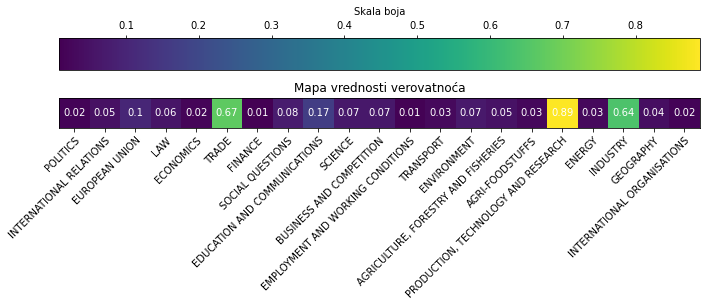

In [43]:
visualize_probabilities(probabilities)

Као што можемо видети, класификатор је најсигурнији око предикције лабеле 'PRODUCTION, TECHNOLOGY AND RESEARCH'. Променом прагова који се користе можемо утицати на строгост класификације.  

Важна напомена у раду нашег модела је да ради само са првих 512 токена репрезентације документа. Уколико је потребно класификовати дужи садржај, предлог је поделити га на неке разумно дуге делове, на пример, на чланове, и покренути класификатор над сваким од делова.  

Закони се много чешће могу пронаћи као документи у PDF формату. Због тога може бити згодно познавање библиотеке PyPDF2 која омогућава рад са овом врстом докумената. Демонстрираћемо како ова библиотека ради над PDF верзијом Закона o правној заштити индустријског дизајна Републике Србије. Закон се може пронаћи на <a href='https://www.zis.gov.rs//upload/documents/pdf_en/pdf_dizajn/Prevod%20Zakona%20dizajn%202020%20(2).pdf'>овој адреси</a>, а ми смо га преузели и сачували у директоријуму *data/the_law_on_legal_protection_of_design.pdf*.

In [44]:
document_path = "data/laws/the_law_on_legal_protection_of_design.pdf"

Следећим блоком кода можемо учитати библиотеку PyPDF2 и припремити читач *document_reader* документа. 

In [45]:
import PyPDF2

In [46]:
file = open(document_path, "rb")
document_reader = PyPDF2.PdfFileReader(file)

Неке основне информације о документу попут наслова, имена аутора, датума креирања и слично можемо добити коришћењем функције *getDocumentInfo*. 

In [47]:
document_info = document_reader.getDocumentInfo()

In [48]:
document_info

{'/Author': 'Mirela Boskovic',
 '/CreationDate': "D:20200122125217+01'00'",
 '/Creator': 'Microsoft® Word 2010',
 '/ModDate': "D:20200122142601+01'00'",
 '/Producer': 'Microsoft® Word 2010',
 '/Title': 'THE LAW ON LEGAL PROTECTION OF DESIGN1'}

Информације о броју страна документа можемо добити коришћењем функције *getNumPages*.

In [49]:
print('Broj strana dokumenta: ', document_reader.getNumPages())

Broj strana dokumenta:  40


Неку конкретну страну документа можемо добити коришћењем функције *getPage*, а њен текстуални садржај коришћењем функције *extractText*. Следећим блоком кода можемо прочитати садржај са странице број 12 (подсетник: нумерација почиње од нуле!).

In [50]:
test_page = document_reader.getPage(11)

In [51]:
test_page_content = test_page.extractText()

In [52]:
test_page_content

' \n12\n \ninternational agreement between these states, regardless of the subsequent \nlegal\n \nstatus of such\n \napplication.\n \nThe legal or natural person referred to in paragrap\nh 1 of this Article \nshall submit to the\n \ncompetent authority the copy of such application certified \nby the competent authority of the\n \nmember state of the Paris Union, the \nWorld Trade Organization, or the international organization\n \nwhere the \napplication was \nfiled, not later than three months as of the date of filing the \napplication\n \nin \nRepublic of \nSerbia.\n \n \nPriority Certificate\n \n \nArticle 25a\n \nOn the reqeuest of the domestic or foreign natural or legal person \nwhich has filed the industial design right application,\n \nthe competent \nauthority shall issue a priority certificate. \n \nThe request for issuing a priority certificate shall contain, in \nparticular: a representation identical to the one in the application; a \ndescription identical to the one in th

Као што можемо видети, прочитани текст садржи знаке за нови ред (\n) које је потребно обрисати. Модел са којим радимо очекује текст записан и малим и великим словима (у његовом имену стоји *uncased*) па није потребно вршити нормализацију и усаглашавање овог типа. По потреби можемо обрисати бројеве страница, уклонити електронске адресе или слично. Функција *clean_document* може да обједини све неопходне кораке припреме. Тренутно, она брише знак за нови ред, замењује вишеструке белине једноструким и брише број странице са почетка документа. 

In [53]:
def clean_document(document, page_number=None):
    document = document.replace('\n', '')
    document = document.replace('\s+', '')
    
    if page_number:
        document = document.strip()
        page_number = str(page_number)
        page_chars = len(page_number)
        if document[0:page_chars] == page_number:
            document = document[page_chars+1:]
    return document

Можемо проверити и како изгледа резултат ове функције. 

In [54]:
clean_document(test_page_content, page_number=12)

'international agreement between these states, regardless of the subsequent legal status of such application. The legal or natural person referred to in paragraph 1 of this Article shall submit to the competent authority the copy of such application certified by the competent authority of the member state of the Paris Union, the World Trade Organization, or the international organization where the application was filed, not later than three months as of the date of filing the application in Republic of Serbia.  Priority Certificate  Article 25a On the reqeuest of the domestic or foreign natural or legal person which has filed the industial design right application, the competent authority shall issue a priority certificate.  The request for issuing a priority certificate shall contain, in particular: a representation identical to the one in the application; a description identical to the one in the application; proof of payment of the fee for the certificate. The priority certificate s

Коначно, можемо видети које лабеле су придружене овој страници и колико је класификатор сигуран приликом њиховог придруживања. 

In [55]:
domains, probabilities = document_classification(clean_document(test_page_content), return_probabilities=True)

In [56]:
print(domains)

['INTERNATIONAL RELATIONS', 'TRADE', 'PRODUCTION, TECHNOLOGY AND RESEARCH', 'GEOGRAPHY']


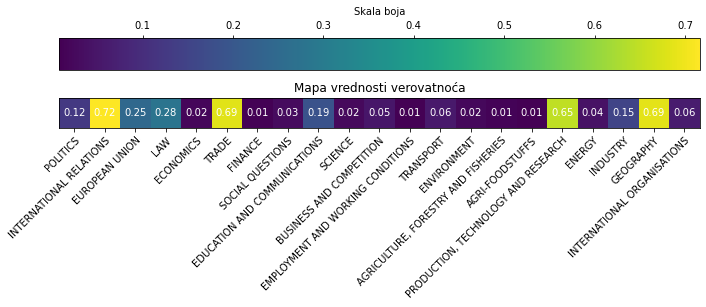

In [57]:
visualize_probabilities(probabilities)

Лабела 'GEOGRAPHY' је можда неочекивана, претпоставка је да су имена земаља које се налазе у овом документу утицала на овакав закључак.

## Задатак за вежбу

1. Извршите ћелију у наставку, а потом кликом на дугме *Upload* учитајте документ по избору. У даљем раду га можете користити под именом *demo.pdf*. Можете даље издвојите неку страницу пратећи функционалности библиотеке *PyPDF*, а затим проверити које лабеле јој класификатор придружује. 

Напомена: Не заборавите да модел оптимално ради са документима који су дужине око 512 токена тј. дужине два до три параграфа. 

In [58]:
import ipywidgets as widgets
from IPython.display import display

In [59]:
uploader = widgets.FileUpload(accept='.pdf', multiple=False, maxsize='10M')

def on_document_upload(change):
    for f in uploader.value:
        content = uploader.value[f]['content']
        with open('data/laws/demo.pdf', 'wb') as demo_file:
            demo_file.write(content)
            
uploader.observe(on_document_upload)

display(uploader)

FileUpload(value={}, accept='.pdf', description='Upload')